# Research Skills: Spatiotemporal Data Analyis
## Take-home Assignment
Sharon Ong, Department of Cognitive Science and Artificial Intelligence,
Tilburg University
Academic Year 2023-2024

Your First Name: Daniel

Your Last Name: Koltai

Your Student ID: 2123303

In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install libpysal
!pip install esda
!pip install spreg

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import libpysal as ps
import esda
import spreg

# Part 2A: Estimating the percentage of votes in the 2023 Netherlands election with spatial autoregression
1. [4 points]

Load your dataset of election results (XXXXX party.csv). Compute the percentage of votes the party received in each municipality. This is your target variable. Create a histogram plot of your target variable and the features; average income, average house price and population density. Are the target variable and features normally distributed?

In [5]:
df = pd.read_csv('2123303_spatial.csv')

In [6]:
df.head()

,GM_NAAM,GM_CODE,OuderRegioCode,GrootOuderRegioCode,TotalVotes,BBB,Average_House_Price,Average_Income,Population_Density,Population_Increase
0,Groningen,G0014,K1,P20,146649,3331,258.9,23.3,1266,57
1,Almere,G0034,K5,P24,104685,2721,294.3,24.7,1686,1365
2,Stadskanaal,G0037,K1,P20,19335,1582,185.5,20.5,271,-189
3,Veendam,G0047,K1,P20,16441,1013,187.5,21.6,362,-41
4,Zeewolde,G0050,K5,P24,14376,1071,275.7,25.7,94,140


In [7]:
df['y'] = df['BBB'] / df['TotalVotes'] * 100


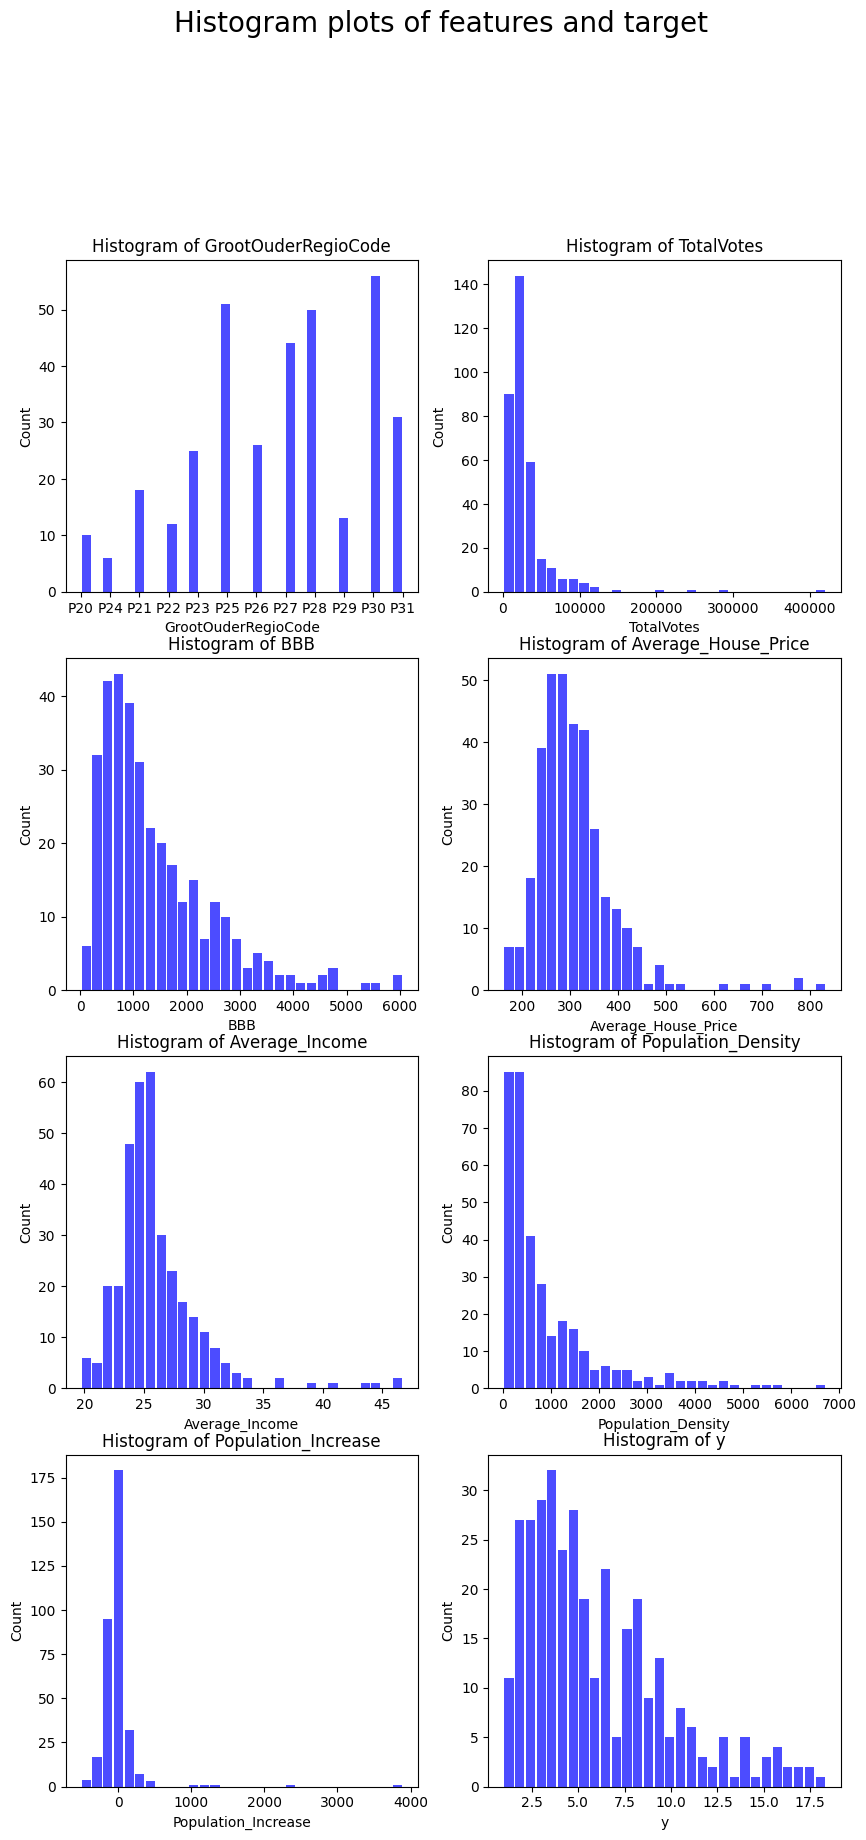

In [8]:
# Create a histogram plot of your target variable 'y' and the features use matlpotlib
plt.figure(figsize=(10, 25))
plt_no = 1
for i in range(3, len(df.columns)):
    feature = df.columns[i]
    plt.subplot(5, 2, plt_no)
    plt.hist(df[feature], bins=30, color='blue', alpha=0.7, rwidth=0.85)
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt_no += 1
plt.suptitle(f'Histogram plots of features and target', size=20)
plt.show()


- total votes, BBB votes, average house price, average income, population density, population increase, target (percentage of votes for BBB) are all normally distributed

2. [6 points]
Load the shapefile of the townships of the Netherlands and display the first five rows. Remove all the polygons (and multipolygons) representing water. Note, you do not have to display the Choropleth Map of your results, but you can if you want to. Create a new column called Pct Votes in the geodataframe and copy over the contents in column containing the percentage of votes in the dataframe from Question 1. Display a Choropleth Map of the townships, with colors assigned by Pct Votes (columns=Pct Votes). Use a quantiles scheme with 5 quantiles.

In [9]:
# Load the shapefile of the townships of the Netherlands and display the first five rows
import os
path = os.path.join('wijkbuurtkaart_2023_v1', 'gemeenten_2023_v1.shp')
w = gpd.read_file(path)
w.head()


,GM_CODE,GM_NAAM,H2O,OAD,STED,BEV_DICHTH,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,...,P_GEBBL_EU,P_GEBBL_NE,OPP_TOT,OPP_LAND,OPP_WATER,JRSTATCODE,JAAR,layer,path,geometry
0,GM0034,Almere,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0034,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"MULTIPOLYGON (((150087.299 479382.379, 150000...."
1,GM0050,Zeewolde,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0050,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"MULTIPOLYGON (((155047.320 474836.246, 155049...."
2,GM0060,Ameland,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0060,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"POLYGON ((196000.000 608000.000, 195250.000 60..."
3,GM0072,Harlingen,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0072,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"MULTIPOLYGON (((158000.000 581000.000, 158331...."
4,GM0088,Schiermonnikoog,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0088,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"POLYGON ((219000.000 616201.447, 219000.000 61..."


In [10]:
# Remove all the polygons (and multipolygons) representing water
print(len(w))
w = w.loc[w.H2O == 'NEE'].copy()
print(len(w))

424
343


In [11]:
# Create a new column called Pct Votes in the geodataframe and copy over the contents in column containing the percentage of votes in the dataframe from Question 1.
w['Pct Votes'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['y'])

- should other columns be copied too?


In [12]:
w['BBB'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['BBB'])
w['TotalVotes'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['TotalVotes'])
w['Average_Income'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['Average_Income'])
w['Average_House_Price'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['Average_House_Price'])
w['Population_Density'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['Population_Density'])

Text(0.5, 1.0, 'Percentage of votes per municipality')

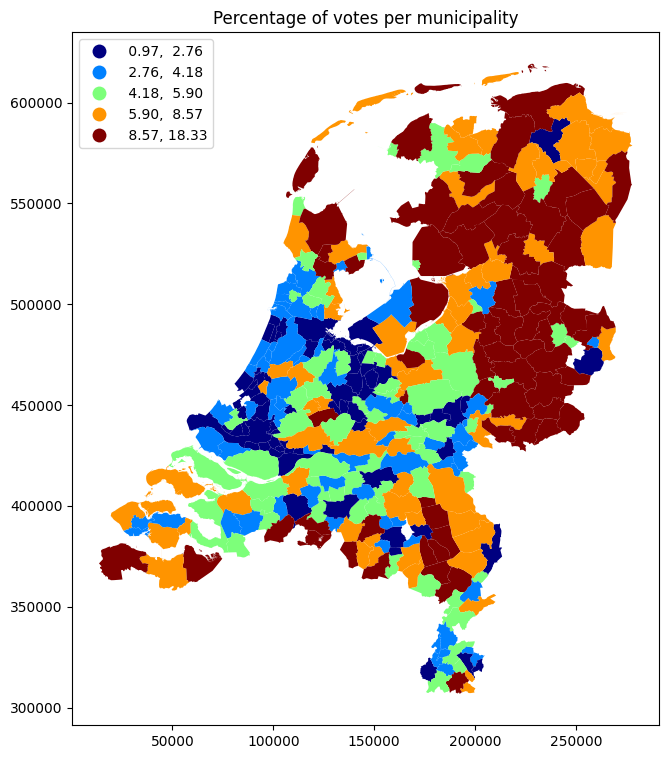

In [13]:
w.plot(figsize=(9, 9), column='Pct Votes', scheme='QUANTILES', k=5, cmap='jet', legend=True, legend_kwds={'loc': 'upper left'})
plt.title('Percentage of votes per municipality')

3. [10 points]

Using contiguity based weighting schemes (rook and queen) and KNN based weighingt schemes, compute and compare the global autocorrelation (Global Moran’s I) of Pct Votes and the log transformation of the Pct Votes. Try at least 2 different K number of neighbours. Which feature (Pct Votes or its log transformation) has a higher autocorrelation?

In [14]:
# surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Using contiguity based weighting schemes (Queen and Rook)
wq = ps.weights.Queen.from_dataframe(w)
wr = ps.weights.Rook.from_dataframe(w)

# Using knn based weighting schemes and setting transformations
wknn = {}
for i in range(1, 20, 3):
    wknn[i] = ps.weights.KNN.from_dataframe(w, k=i)
    wknn[i].transform = "r"

# fill nan values with 0 for pct votes
w['Pct Votes'] = w['Pct Votes'].fillna(0)
# Computing log of 'Pct Votes' and adding it to dataframe
# Adding a small value to avoid log(0) which is undefined
w['log Pct Votes'] = np.log(w['Pct Votes'] + 0.001)

# Compute the global Moran's I for 'Pct Votes' using Queen weights
mi = esda.Moran(w['Pct Votes'], wq)
mi_log = esda.Moran(w['log Pct Votes'], wq)

# Printing Moran's I results for all weight schemes
print("Moran's I for Queen weights on Pct Votes and log Pct Votes:")
print(f"Pct Votes: {mi.I}, p-value: {mi.p_sim}")
print(f"log Pct Votes: {mi_log.I}, p-value: {mi_log.p_sim}")
print("\n")

# Try at least 2 different K number of neighbours
mi_knn = {}
print("Moran's I for KNN weights on Pct Votes and log Pct Votes:")
for i in range(1, 20, 3):
    print(f"KNN with {i} neighbours")
    mi_knn[i] = esda.Moran(w['Pct Votes'], wknn[i])
    print(f"Pct Votes: {mi_knn[i].I}, p-value: {mi_knn[i].p_sim}")
    mi_knn[i] = esda.Moran(w['log Pct Votes'], wknn[i])
    print(f"log Pct Votes: {mi_knn[i].I}, p-value: {mi_knn[i].p_sim}")


('WARNING: ', 6, ' is an island (no neighbors)')
Moran's I for Queen weights on Pct Votes and log Pct Votes:
Pct Votes: 0.4992661682768822, p-value: 0.001
log Pct Votes: 0.04784315853822306, p-value: 0.079


Moran's I for KNN weights on Pct Votes and log Pct Votes:
KNN with 1 neighbours
Pct Votes: 0.47849121776032155, p-value: 0.001
log Pct Votes: 0.0466728127279377, p-value: 0.15
KNN with 4 neighbours
Pct Votes: 0.4764727362475518, p-value: 0.001
log Pct Votes: 0.06983081032771776, p-value: 0.026
KNN with 7 neighbours
Pct Votes: 0.4800810711686127, p-value: 0.001
log Pct Votes: 0.06676930464879728, p-value: 0.014
KNN with 10 neighbours
Pct Votes: 0.44068733646674724, p-value: 0.001
log Pct Votes: 0.0428780375844564, p-value: 0.035
KNN with 13 neighbours
Pct Votes: 0.41878755012237723, p-value: 0.001
log Pct Votes: 0.03439453389586551, p-value: 0.052
KNN with 16 neighbours
Pct Votes: 0.3980991699781365, p-value: 0.001
log Pct Votes: 0.035743194929730535, p-value: 0.028
KNN with 19 neig

- Pct Votes has higher autocorrelation (~0.45) than log Pct Votes (~0.04) for the spatial weight matrices tested (queen weight, knn weight with 0<n<20)
- Pct Votes autocorrelation is also much more statistically significant (p-value: ~0.001) vs log Pct Votes (p-vlaue in the range of (0.01, 0.15))

4. [10 points]
Compute the local autocorrelation for the same two features. Choose the weighting scheme and parameters for which gave you the highest correlation in 3.3. Identify the ’hotspots’ and ’coldspots’ by display the hotspots as these townships with different colors in a scatter plot.

Text(0.5, 1.0, 'coldspots for log Pct Votes with Knn weights (n=4)')

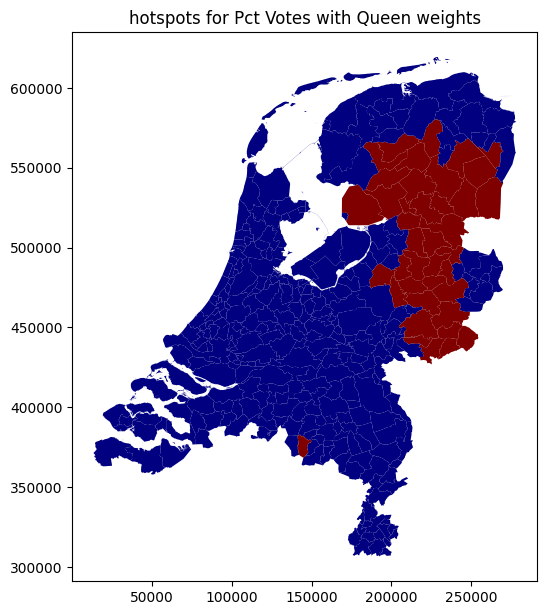

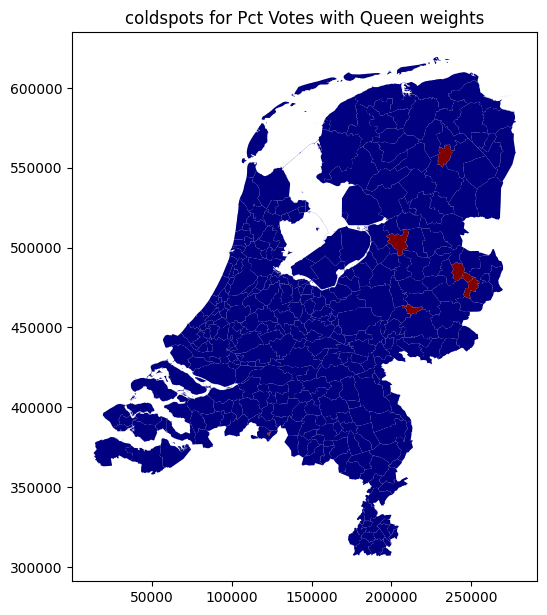

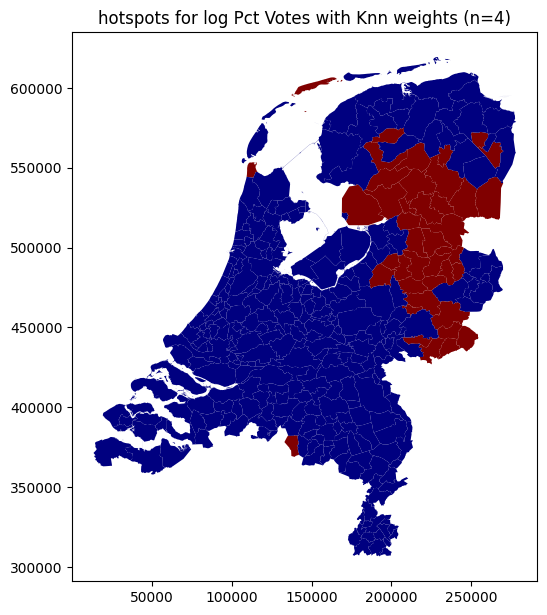

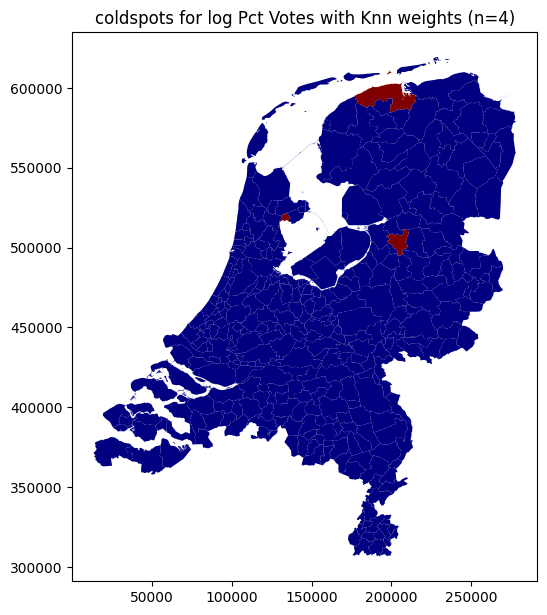

In [15]:
# highest autocorrelation for Pct Votes with queen weights
I_district_pct_votes = esda.Moran_Local(w['Pct Votes'], wq)

sig = I_district_pct_votes.p_sim < 0.05
hotspot = sig * I_district_pct_votes.q==1
coldspot = sig * I_district_pct_votes.q==2

w.plot(hotspot, figsize=(6,12), cmap = 'jet')
plt.title('hotspots for Pct Votes with Queen weights')
w.plot(coldspot, figsize=(6,12), cmap = 'jet')
plt.title('coldspots for Pct Votes with Queen weights')

# highest autocorrelation for log pct votes with knn weights with 4 neighbours (where p-value is significant)
I_district_log_pct_votes_knn = esda.Moran_Local(w['log Pct Votes'], wknn[4])
sig = I_district_log_pct_votes_knn.p_sim < 0.05
hotspot = sig * I_district_log_pct_votes_knn.q==1
coldspot = sig * I_district_log_pct_votes_knn.q==2

w.plot(hotspot, figsize=(6,12), cmap = 'jet')
plt.title('hotspots for log Pct Votes with Knn weights (n=4)')
w.plot(coldspot, figsize=(6,12), cmap = 'jet')
plt.title('coldspots for log Pct Votes with Knn weights (n=4)')

5. [2 points] Perform a log transformation of your target variable, population density, average income and average house price features

In [16]:
w['log BBB'] = np.log(w['BBB'] + 0.001)
w['log TotalVotes'] = np.log(w['TotalVotes'] + 0.001)
w['log Population_Density'] = np.log(w['Population_Density'] + 0.001)
w['log Average_Income'] = np.log(w['Average_Income'] + 0.001)
w['log Average_House_Price'] = np.log(w['Average_House_Price'] + 0.001)


In [17]:
columns_to_fill = ['log BBB', 'log TotalVotes', 'log Population_Density', 'log Average_Income', 'log Average_House_Price']

# Fill NaN values with the mean for each specified column
for column in columns_to_fill:
    w[column] = w[column].fillna(w[column].mean())

In [18]:
w[['log BBB', 'log TotalVotes', 'log Population_Density', 'log Average_Income', 'log Average_House_Price']].isna().sum()

log BBB                    0
log TotalVotes             0
log Population_Density     0
log Average_Income         0
log Average_House_Price    0
dtype: int64

In [19]:
#
# Your code goes here
#

# variables to use: 'log Population_Density', 'log Average_Income', 'log Average_House_Price'
# target variable: 'log BBB'
# spatial weights: Queen contiguity and KNN with 4 neighbours (compare results)
# a)
# regression model: linear regression

weight_matrix, ids = wq.full()

# Fit OLS model
variable_names = ['log Population_Density', 'log Average_Income', 'log Average_House_Price']
import numpy as np
m1 = spreg.OLS(w['log BBB'].values, w[variable_names].values, name_y='log BBB', name_x=variable_names)
print(m1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     log BBB                Number of Observations:         343
Mean dependent var  :      6.9639                Number of Variables   :           4
S.D. dependent var  :      0.7900                Degrees of Freedom    :         339
R-squared           :      0.2289
Adjusted R-squared  :      0.2220
Sum squared residual:     164.614                F-statistic           :     33.5355
Sigma-square        :       0.486                Prob(F-statistic)     :   5.266e-19
S.E. of regression  :       0.697                Log likelihood        :    -360.793
Sigma-square ML     :       0.480                Akaike info criterion :     729.587
S.E of regression ML:      0.6928                Schwarz criterion     :     744.938

------------------------------------------------------------

6. [8 points]
Your goal is to estimate of Pct Votes (log values) per municipality based on the explanatory variables (the average house price and population density) and the spatially lagged Pct Votes (endogenous regressor). Please use the log form of the variables from Question 5 for this question. Please use the “spreg” package for this task and the weighting scheme you selected in Question 4. Chose two weighing
scheme to compare
(a) Fit a linear regression model, where your target variable is the Pct Votes (in log form) and your features (exploratory variables) are population density, average income and average house price features (in log form).
(b) Using the GM Lag, run a spatial autoregression model with the features in (a).
Compare the mean square error for these 4 estimators. Which regressor model resulted in the lowest
mean square error

In [20]:
# w['coords'] = w['geometry'].apply(lambda x: x.representative_point().coords[:])
# w['coords'] = [coords[0] for coords in w['coords']]
# w['longitude'] = w['coords'].apply(lambda x: x[0])
# w['latitude'] = w['coords'].apply(lambda x: x[1])

In [21]:
geometries = gpd.GeoDataFrame(w, geometry='geometry')
queen_w = ps.weights.contiguity.Queen.from_dataframe(geometries)
queen_w.transform = 'R'

('WARNING: ', 6, ' is an island (no neighbors)')


In [22]:
weight_matrix, ids = wknn[4].full()

# Fit OLS model
variable_names = ['log Population_Density', 'log Average_Income', 'log Average_House_Price']
import numpy as np
m2 = spreg.OLS(w['log BBB'].values, w[variable_names].values, name_y='log BBB', name_x=variable_names)
print(m2.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     log BBB                Number of Observations:         343
Mean dependent var  :      6.9639                Number of Variables   :           4
S.D. dependent var  :      0.7900                Degrees of Freedom    :         339
R-squared           :      0.2289
Adjusted R-squared  :      0.2220
Sum squared residual:     164.614                F-statistic           :     33.5355
Sigma-square        :       0.486                Prob(F-statistic)     :   5.266e-19
S.E. of regression  :       0.697                Log likelihood        :    -360.793
Sigma-square ML     :       0.480                Akaike info criterion :     729.587
S.E of regression ML:      0.6928                Schwarz criterion     :     744.938

------------------------------------------------------------

In [23]:
y = w['log BBB'].values
X = w[['log Population_Density', 'log Average_Income', 'log Average_House_Price']].values
predictions = m2.predy
mse = np.mean((y - predictions.flatten())**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.47992474939940655


In [24]:
weight_matrix, ids = wknn[4].full()

# Fit OLS model
variable_names = ['log Population_Density', 'log Average_Income', 'log Average_House_Price']
import numpy as np
m1 = spreg.OLS(w['log BBB'].values, w[variable_names].values, name_y='log BBB', name_x=variable_names)
print(m1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     log BBB                Number of Observations:         343
Mean dependent var  :      6.9639                Number of Variables   :           4
S.D. dependent var  :      0.7900                Degrees of Freedom    :         339
R-squared           :      0.2289
Adjusted R-squared  :      0.2220
Sum squared residual:     164.614                F-statistic           :     33.5355
Sigma-square        :       0.486                Prob(F-statistic)     :   5.266e-19
S.E. of regression  :       0.697                Log likelihood        :    -360.793
Sigma-square ML     :       0.480                Akaike info criterion :     729.587
S.E of regression ML:      0.6928                Schwarz criterion     :     744.938

------------------------------------------------------------

In [25]:
y = w['log BBB'].values
X = w[['log Population_Density', 'log Average_Income', 'log Average_House_Price']].values
predictions = m1.predy
mse = np.mean((y - predictions.flatten())**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.47992474939940655


In [26]:
variable_names = ['log Population_Density', 'log Average_Income', 'log Average_House_Price']
wq = ps.weights.Queen.from_dataframe(w)
m3 = spreg.GM_Lag(w['log BBB'].values, w[variable_names].values, w=wq, name_y='log BBB', name_x=variable_names)
print(m3.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     log BBB                Number of Observations:         343
Mean dependent var  :      6.9639                Number of Variables   :           5
S.D. dependent var  :      0.7900                Degrees of Freedom    :         338
Pseudo R-squared    :      0.4919
Spatial Pseudo R-squared:  0.4542

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        16.01306         0.81352        19.68359         0.00000
log Population_Density        -0.07053         0.03064        -2.30204         0.02133
  log Average_Income        -2.18251    

In [27]:
y = w['log BBB'].values
X = w[['log Population_Density', 'log Average_Income', 'log Average_House_Price']].values
predictions = m3.predy
mse = np.mean((y - predictions.flatten())**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.31629900429429886


In [28]:
weight_matrix, ids = wknn[4].full()
variable_names = ['log Population_Density', 'log Average_Income', 'log Average_House_Price']
wq = ps.weights.Queen.from_dataframe(w)
m4 = spreg.GM_Lag(w['log BBB'].values, w[variable_names].values, w=wknn[4], name_y='log BBB', name_x=variable_names)
print(m4.summary)


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     log BBB                Number of Observations:         343
Mean dependent var  :      6.9639                Number of Variables   :           5
S.D. dependent var  :      0.7900                Degrees of Freedom    :         338
Pseudo R-squared    :      0.2560
Spatial Pseudo R-squared:  0.2251

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        15.07014         2.19880         6.85379         0.00000
log Population_Density        -0.04536         0.04601        -0.98576         0.32425
  log Average_Income        -2.94438    

In [29]:
y = w['log BBB'].values
X = w[['log Population_Density', 'log Average_Income', 'log Average_House_Price']].values
predictions = m4.predy
mse = np.mean((y - predictions.flatten())**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.46330608360453923


- GM_lag with queen weights has the lowest MSE of 0.32 while OLS models and KNN weights have an MSE >0.46